<h2><center>TOP 10 INDUSTRIAL SECTIONS AND THEIR CONTRIBUTED GDP</center></h2>
<h3><center>IN THE UNITED STATES - FROM 1950 TO 2021</center></h3>

### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

%matplotlib notebook

### 2. Loading data
The data base is from an official website of the United States government.
<br>https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=1#reqid=70&step=1&isuri=1&acrdn=1
<br> I downloaded Gross Domestic Product - Values Added, orderd by industrial sections. Let's take a look at the data.

In [3]:
# Loading data
df = pd.read_csv('GDP_US.csv', skipinitialspace=True)
df.drop('Line', axis = 1, inplace = True)
df.rename(columns = {'Unnamed: 1': 'Description'}, inplace = True)
# df.head()

### 3. Cleaning data
There are many subcategories that we should remove from the table. For example, *'Agriculture, forestry, fishing, and hunting'* section contains *'Farms'* and *'Forestry, fishing, and related activities'*. They can be recognized by the indents in their names.
<br>In this project, we only focus on the private industries, therefore government and military services will be deducted.
<br>
<br>We represent some industrial descriptions which are too long to facilitate the figures.

In [4]:
# Remove white spaces in industrial fields
df['Description'] = df['Description'].str.strip()

# Main industrial sections and years required.
industries = ['Agriculture, forestry, \nfishing, and hunting', 'Mining', 'Utilities', 'Construction', 
             'Manufacturing', 'Wholesale trade', 'Retail trade', 'Transportation \nand warehousing',
             'Information', 'Finance and insurance', 'Real estate and \nrental and leasing',
             'Professional and \nbusiness services', 'Educational services', 'Health care and \nsocial assistance',
             'Arts, entertainment, \nand recreation', 'Accommodation and food services',
             'Other services, except government']

df.replace(['Agriculture, forestry, fishing, and hunting', 'Transportation and warehousing', 'Real estate and rental and leasing', 'Health care and social assistance', 'Professional and business services'], 
           ['Agriculture, forestry, \nfishing, and hunting', 'Transportation \nand warehousing', 'Real estate and \nrental and leasing', 'Health care and \nsocial assistance', 'Professional and \nbusiness services'], 
           inplace = True) # just for plotting

# Adjust the data to float
df.replace('...', np.nan, inplace = True)
df.iloc[:,1:] = df.iloc[:,1:].astype(float, errors = 'raise')

# GDP dataset
gdp = df.loc[df['Description'].isin(industries)]
gdp.set_index('Description', inplace = True)
gdp.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Description,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry, \nfishing, and hunting",19.9,23.0,22.1,20.0,19.6,18.8,18.6,18.4,20.6,19.0,...,179.2,178.7,214.3,198.9,180.1,165.8,175.9,175.6,162.6,174.5
Mining,7.6,8.4,8.3,8.7,8.8,10.0,10.8,10.9,10.0,9.8,...,357.8,360.5,387.8,417.0,261.7,218.1,276.9,320.1,295.7,182.1
Utilities,4.9,5.6,6.1,6.8,7.5,8.1,8.6,9.3,10.0,11.0,...,288.3,280.7,286.9,298.3,299.2,302.0,311.6,319.0,333.3,341.7
Construction,12.8,15.2,16.4,17.0,17.1,18.4,20.2,21.3,20.9,22.7,...,525.6,554.9,588.7,637.7,695.3,747.7,800.6,847.1,903.6,895.9
Manufacturing,80.3,95.8,100.0,109.5,103.7,117.3,122.4,127.5,120.9,136.0,...,1873.6,1934.7,1997.3,2053.5,2131.0,2102.9,2199.3,2334.1,2370.9,2272.0


### 4. Bar chart race

#### 4.1. Basic horizontal bar chart

Let's plot the top 7 US industrial sections contributed the most GDP in 2020

In [5]:
# Color by industry
colors = dict(zip(industries, 
                 ['#5D8AA8', '#F0F8FF', '#EFDECD', '#7fffd4', '#4b5320', '#ffe135', '#8a2be2',
                 "#980505","#006a4e","#D84E4E","#0095b6","#D39B5F","#F7EC10","#D0F710","#9CF710",
                  "#B4D67F","#969C8E"]))


# Create movement in bar chart race
def barchart(year):
    
    ax.clear()
    gdp_df = gdp.loc[:, year].sort_values(ascending = True).tail(7)
    names = gdp_df.index
    values = gdp_df.values

    # Plotting horizontal bar chart
#     plt.yticks(range(0, 10), names)
    ax.barh(range(0, 7), values, color = [colors[x] for x in names], height = 0.8)

    # show the texts on the bar (Industry, GDP)
    dx = values.max()/100
    for i, (value, name) in enumerate(zip(values, names)):
        ax.text(value - dx, i - 0.1, name,  size = 8, ha = 'right', fontweight = 'bold')  
        ax.text(value + dx, i - 0.1, value, size = 8, ha='left')  
    
    ax.text(1, 0.4, year, transform = ax.transAxes, color='#777777', size = 20, ha = 'right', weight=800)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Format the x, y ticks
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.tick_params(axis = 'x', colors='#777777', labelsize = 8)

    # Grid-lines
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)

    # Figure title
    ax.text(0, 1.05, 'TOP 10 US INDUSTRIES FROM 1950 TO 2020', transform = ax.transAxes,
            size = 15, weight=600, ha='left')
    plt.box(False)

#### *Let's test the function barchart*

<IPython.core.display.Javascript object>


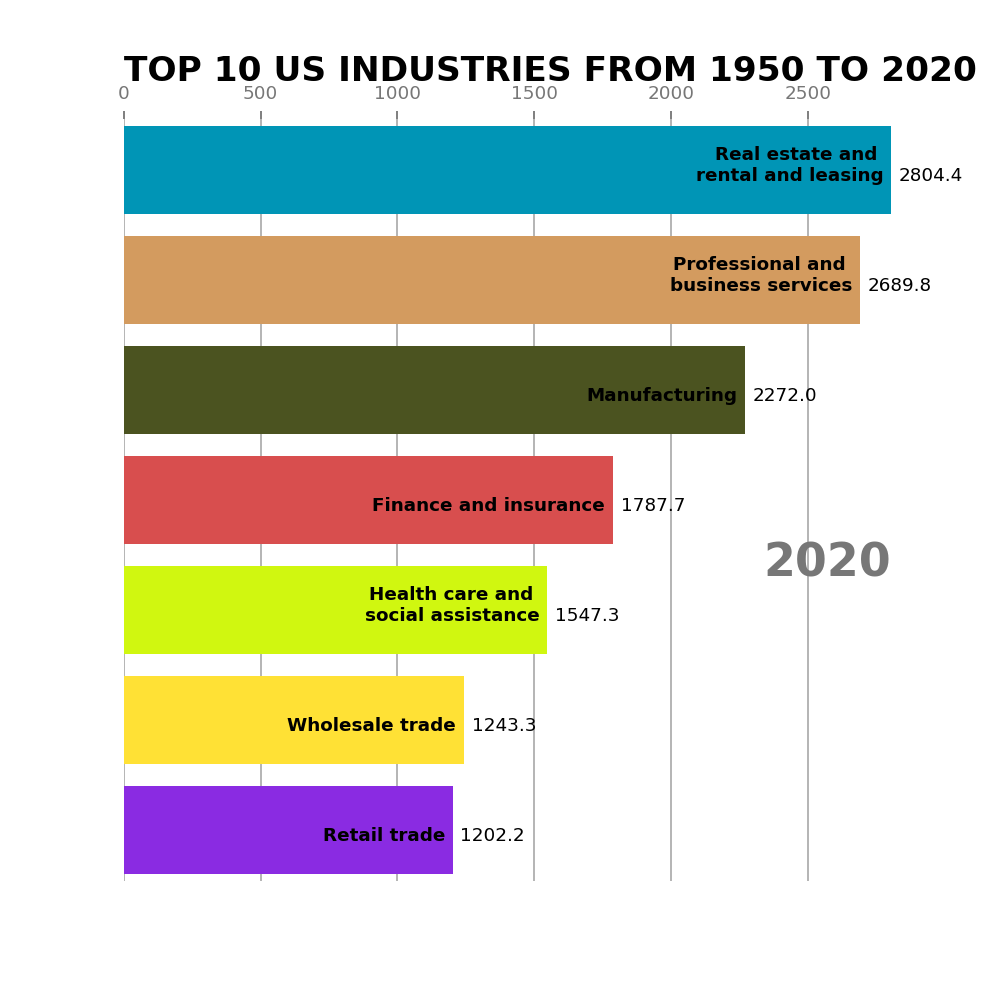

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
barchart('2020')

#### 4.2. Horizontal Movement in Bar Chart Race:

<IPython.core.display.Javascript object>


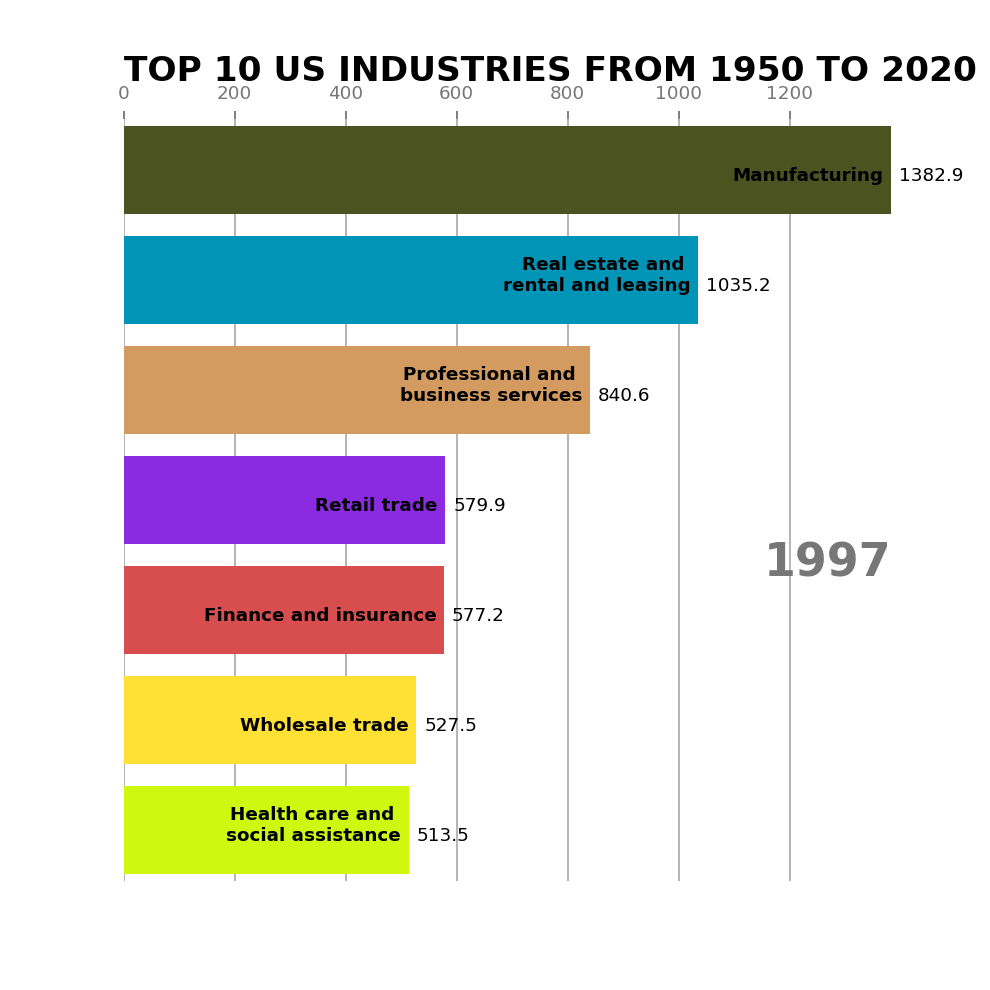

In [7]:
from IPython.display import HTML
years = gdp.columns
fig,ax = plt.subplots(figsize=(6, 6)) #Set figure for plot
animator = FuncAnimation(fig, barchart, frames = years, interval = 300)
HTML(animator.to_html5_video())
# HTML(animator.to_jshtml())